In [2]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from scipy import signal
from scipy import stats
from scipy import linalg
from scipy import fft

import sys
sys.path.insert(0,'..')
import specsens as ss

In [30]:
sample_freq = 1e6  # in Hz
length = 1.0  # in s
signal_power = 0.0  # in dB
noise_power = 0.0  # in dB

# create the signal
wm = ss.WirelessMicrophone(f_sample=sample_freq, t_sec=length)
sig = wm.get_soft(f_center=1e5, power=signal_power, dB=True)
sig += wm.get_soft(f_center=-1e5, power=signal_power, dB=True)
sig += wm.get_soft(f_center=3e5, power=signal_power, dB=True)
sig += wm.get_soft(f_center=-3e5, power=signal_power, dB=True)

# create the noise
wgn = ss.WhiteGaussianNoise(f_sample=sample_freq, t_sec=length)
noise = wgn.get_signal(power=noise_power, dB=True)

# ensure noise and signal have same length
assert wm.num_samples == wgn.num_samples
num_samples = wm.num_samples

# create actual signal ('both') comprising of signal and additive white gaussian noise (AWGN)
both = sig + noise

# print some info about signal and noise
print('Signal power: %.2f dB' % (ss.util.signal_power(sig, dB=True)))
print('Noise power:  %.2f dB' % (ss.util.signal_power(noise, dB=True)))
print('SNR:          %.2f dB' % (ss.util.snr(sig, noise, dB=True)))
print('Num samples:  %d ' % (num_samples))

# note, that Parseval's theorem holds
print("Freq energy:  %.2f" % (np.sum(np.abs(fft.fft(both))**2)/sample_freq))
print("Time energy:  %.2f" % (np.sum(np.abs(both)**2 * length)))

Signal power: 6.02 dB
Noise power:  0.01 dB
SNR:          6.01 dB
Num samples:  1000000 
Freq energy:  4998422.58
Time energy:  4998422.58


In [29]:
# from scipy.signal import butter, sosfilt, sosfreqz

# def butter_bandpass(lowcut, highcut, fs, order=10):
#         nyq = 0.5 * fs
#         low = lowcut / nyq
#         high = highcut / nyq
#         sos = butter(order, [low, high], analog=False, btype='band', output='sos')
#         return sos

# def butter_bandpass_filter(data, lowcut, highcut, fs, order=10):
#         sos = butter_bandpass(lowcut, highcut, fs, order=order)
#         y = sosfilt(sos, data)
#         return y

# sig = butter_bandpass_filter(sig, 1, 200000, 1e6)
# both = sig + noise


# sos = butter_bandpass(50000, 150000, 1e6, order=20)
# w, h = sosfreqz(sos, worN=2000)

# plt.figure(figsize=(8, 6))
# plt.plot((1e6 * 0.5 / np.pi) * w, abs(h))
# plt.show()

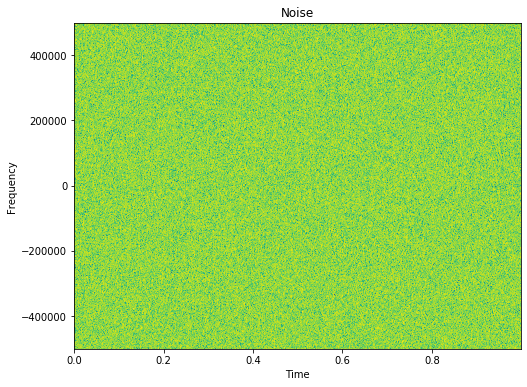

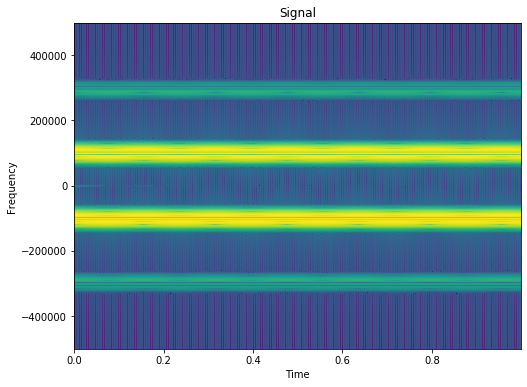

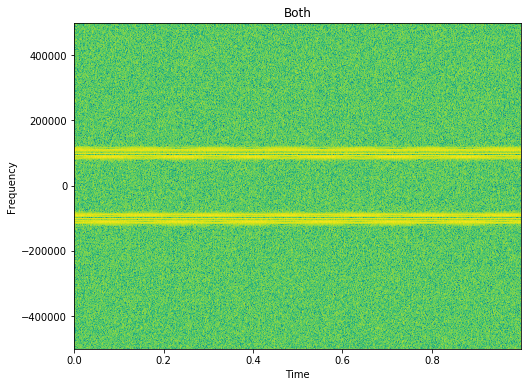

In [28]:
# Plot the spectogram with our short time Fourier transform
nfft = 1024

sft = ss.Stft(n=nfft, window='flattop')
f, t, x = sft.spectogram(noise, sample_freq, normalized=True, dB=True)
plt.figure(figsize=(8, 6))
plt.pcolormesh(t,
               f,
               x,
               shading='flat',
               cmap='viridis',
               snap=True,
               vmin=np.min(x),
               vmax=np.max(x))
plt.title("Noise")
plt.xlabel("Time")
plt.ylabel("Frequency")
plt.show()

sft = ss.Stft(n=nfft, window='flattop')
f, t, x = sft.spectogram(sig, sample_freq, normalized=True, dB=True)
plt.figure(figsize=(8, 6))
plt.pcolormesh(t,
               f,
               x,
               shading='flat',
               cmap='viridis',
               snap=True,
               vmin=np.min(x),
               vmax=np.max(x))
plt.title("Signal")
plt.xlabel("Time")
plt.ylabel("Frequency")
plt.show()

sft = ss.Stft(n=nfft, window='flattop')
f, t, x = sft.spectogram(both, sample_freq, normalized=True, dB=True)

plt.figure(figsize=(8, 6))
plt.pcolormesh(t,
               f,
               x,
               shading='flat',
               cmap='viridis',
               snap=True,
               vmin=np.min(x),
               vmax=np.max(x))
plt.title("Both")
plt.xlabel("Time")
plt.ylabel("Frequency")
plt.show()

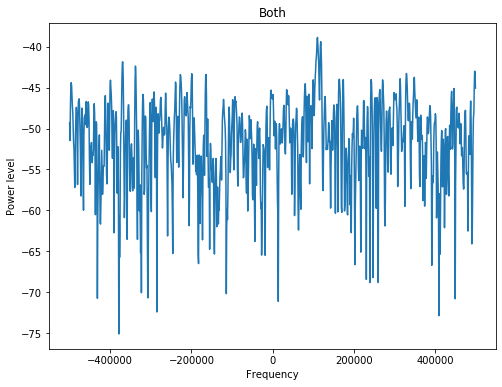

In [15]:
# Plot only 2nd FFT bin using our short time Fourier transform
sft = ss.Stft(n=1024, window='flattop')
f, x = sft.stft(both[1024:2048], sample_freq, normalized=True, dB=True)

plt.figure(figsize=(8, 6))
plt.plot(f, x)
plt.title("Both")
plt.xlabel("Frequency")
plt.ylabel("Power level")
plt.show()

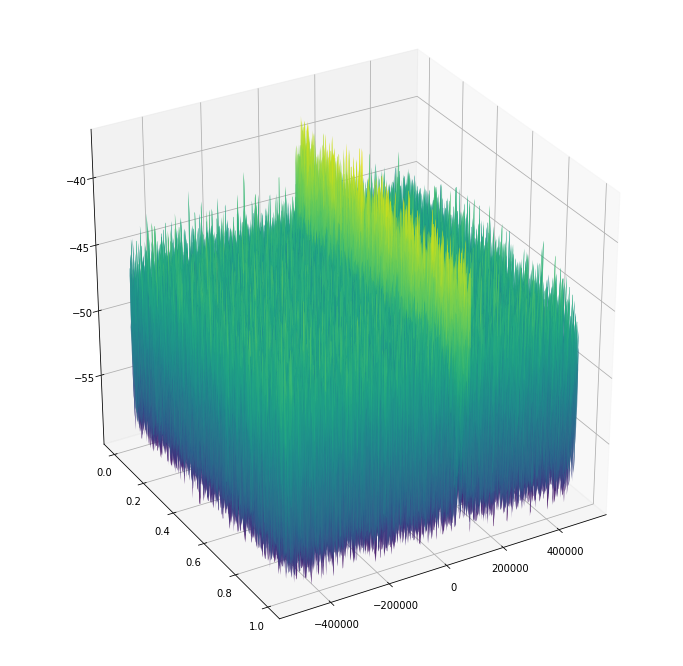

In [14]:
# Use our 3D plot 
ss.plot3d(sig=both,
          f_sample=sample_freq,
          window='flattop',
          nfft=1024,
          clip=-60,
          smooth=.5,
          crop=None,
          elev=30,
          azim=60,
          type='our')